# Introduction to statistics with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

## The data

National Survey of Family Growth, taken from https://github.com/AllenDowney/ThinkStats2


* `caseid` is the integer ID of the respondent.
* `prglngth` is the integer duration of the pregnancy in weeks.
* `outcome` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
* `pregordr` is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.
* `birthord` is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.
* `birthwgt_lb` and `birthwgt_oz` contain the pounds and ounces parts of the birth weight of the baby.
* `agepreg` is the mother’s age at the end of the pregnancy.
* `finalwgt` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.
* `poverty`: poverty level income

More information at https://www.icpsr.umich.edu/icpsradmin/nsfg/search

In [1]:
import pandas as pd

df = pd.read_csv('nsfg.csv')
df.shape # 13593 registros (filas) / 244 variables (columnas)

(13593, 244)

In [2]:
df['birthwgt_lb'] # Seleccionar una columna

0        8.0
1        7.0
2        9.0
3        7.0
4        6.0
5        8.0
6        9.0
7        8.0
8        7.0
9        6.0
10       7.0
11       7.0
12       4.0
13       NaN
14       NaN
15       7.0
16       7.0
17       6.0
18       NaN
19       8.0
20       8.0
21       5.0
22       NaN
23       6.0
24       7.0
25       6.0
26       8.0
27       7.0
28       6.0
29       7.0
        ... 
13563    7.0
13564    7.0
13565    8.0
13566    7.0
13567    NaN
13568    NaN
13569    5.0
13570    6.0
13571    6.0
13572    5.0
13573    6.0
13574    6.0
13575    NaN
13576    6.0
13577    NaN
13578    6.0
13579    7.0
13580    NaN
13581    6.0
13582    NaN
13583    NaN
13584    6.0
13585    NaN
13586    NaN
13587    NaN
13588    6.0
13589    NaN
13590    NaN
13591    7.0
13592    7.0
Name: birthwgt_lb, Length: 13593, dtype: float64

## `matplotlib`

We are only going to use the most basic functions of matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline 
# Para que aparezcan los gráficos en la propia página
plt.style.use('seaborn')

In [4]:
print(plt.style.available)

['seaborn-dark-palette', 'seaborn-notebook', 'fivethirtyeight', 'seaborn-dark', 'fast', 'Solarize_Light2', 'grayscale', 'seaborn', 'seaborn-muted', 'seaborn-colorblind', 'seaborn-darkgrid', 'tableau-colorblind10', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-paper', 'classic', 'seaborn-white', 'seaborn-talk', 'dark_background', 'ggplot', 'seaborn-ticks', 'bmh', 'seaborn-pastel', 'seaborn-poster', 'seaborn-deep', '_classic_test']


### Histogram

/home/dsc/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dsc/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


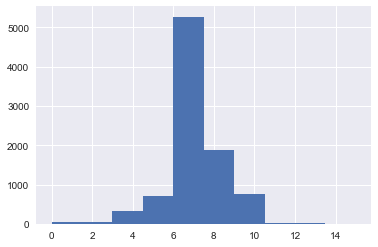

In [5]:
# Los histogramas se utilizan para variables continuas. Se diferencia de los gráficos de barras en que en estos se separan las barras para indicar que son variables discretas
plt.hist(df['birthwgt_lb']); # El ";" es para eliminar la línea de output del comando

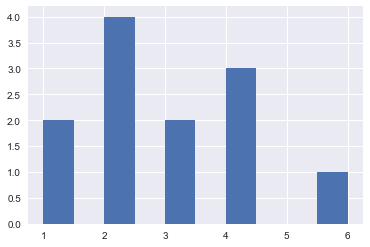

In [6]:
plt.hist([1,2,3,3,2,2,2,1,4,6,4,4]);

### Bar plot

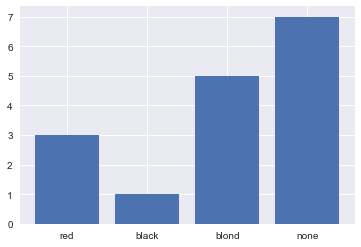

In [7]:
plt.bar(range(4), [3, 1, 5, 7])
plt.xticks(range(4), labels = ['red', 'black', 'blond', 'none']);

In [8]:
df['birthwgt_g'] = df['birthwgt_lb'] * 454 + df['birthwgt_oz'] * 28.35
# Cada columna (serie) se comporta como un array de numpy, por lo que la operación se hace elemento a elemneto

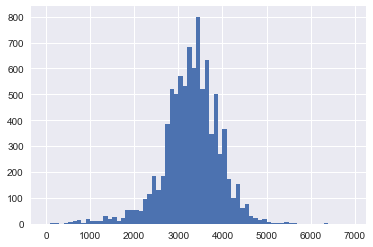

In [9]:
plt.hist(df['birthwgt_g'], bins=range(0, 7000, 100)); # bins lo parte en X (indet.) contenedores de 100 unidades

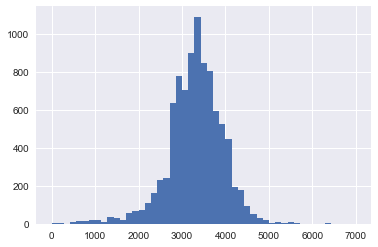

In [10]:
plt.hist(df['birthwgt_g'], bins=np.linspace(0, 7000, 50)); # Si queremos 50 contenedores de X (indet.)unidades

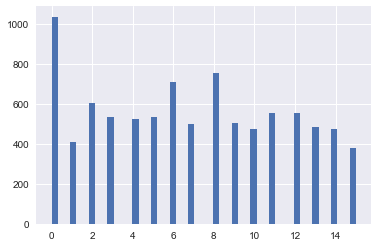

In [11]:
plt.hist(df['birthwgt_oz'], bins=np.linspace(0, 15, 50));

### Scatter plot

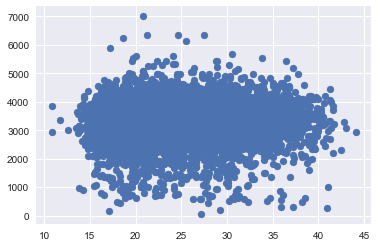

In [12]:
plt.scatter(df['agepreg'], df['birthwgt_g']); # Se usa para representar dos variables

Como aparece un "manchote", no se reconoce la verdadera distribución. Para ello se utilizan mapas de relieve llamados 'contour plot' `matplotlib.pyplot.contour`

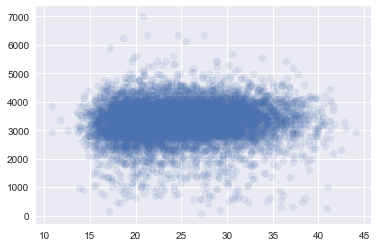

In [13]:
plt.scatter(df['agepreg'], df['birthwgt_g'], alpha=.1) # Para ver mejor la densidad de puntos se controla la transparencia

## Descriptive statistics

### Measures of centrality

#### Average

$$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$$

#### Median

50th percentile

In [14]:
df['birthwgt_g'].mean()

3298.4223722062566

In [15]:
df['birthwgt_g'].median()

3348.1

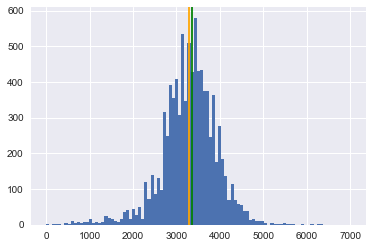

In [16]:
plt.hist(df['birthwgt_g'], bins=np.linspace(0, 7000, 100));
plt.axvline(df['birthwgt_g'].mean(), color='orange')
plt.axvline(df['birthwgt_g'].median(), color='green')

En este caso, la media y la mediana es muy parecida, pero **la sensibilidad de la media es mayor a valores extremos**. Por ejemplo, si estudiáramos el salario de una población, la media se vería desplazada por salarios anormalmente elevados, "confundiendo" sobre el conjunto.  En cambio, la mediana da una información más cercana a la realidad.

### Measures of dispersion

#### Variance and standard deviation

$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

In [17]:
diffs = (df['birthwgt_g'] - df['birthwgt_g'].mean()).dropna()
var = diffs.dot(diffs) / diffs.size
var # var = 408728 g²

408728.86675883376

In [18]:
st_dev = np.sqrt(var)
st_dev # desv_estandar = 639 g

639.3190649111239

### z-score

$$z_i = \frac{x_i - \mu}{\sigma}$$

#### Exercise

Calculate the z-scores of every `birthweight_g` and plot them like we have just done.

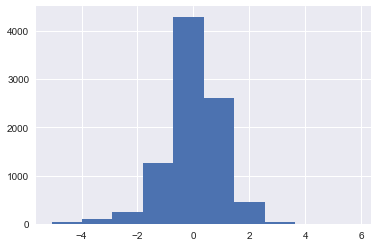

In [19]:
zs = (df['birthwgt_g'] - df['birthwgt_g'].mean()) / df['birthwgt_g'].std()

plt.hist(zs);

## Correlation and covariance

Let's make up some data to play around:

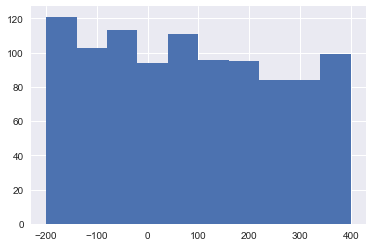

In [20]:
n = 1000
xs = np.random.uniform(-200, 400, size=n) # Crea 1000 puntos uniformemente entre -200 y 400
plt.hist(xs);

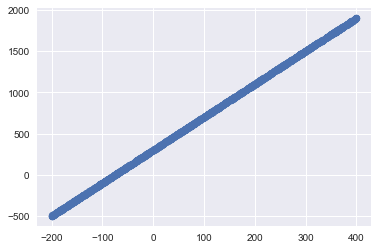

In [21]:
ys = 4 * xs + 300
plt.scatter(xs, ys); # "Aburrido", porque no tiene ruido alguno

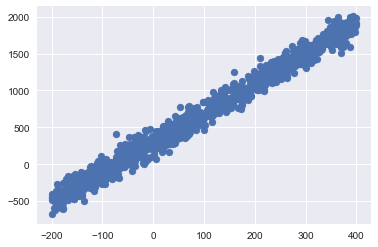

In [22]:
ys = 4 * xs + 300 + np.random.randn(n) * 100
plt.scatter(xs, ys); # Con ruido

In [23]:
def jitter(series, noise_factor=0.1):
    return series + np.random.randn(series.size) * noise_factor * (series.mean() + series.std())

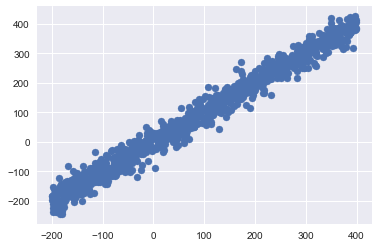

In [24]:
plt.scatter(xs, jitter(xs, .1));

#### Exercise

Make three series ys1, ys2, ys3 that have a linear, quadratic and cubic relationship to xs.

The coefficients should be:

```python
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2
```

In [25]:
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2

ys1 = jitter(x_1 * xs + x_0, .1)
ys2 = jitter(x_2 * xs ** 2 + x_1 * xs + x_0, .1)
ys3 = jitter(x_3 * xs ** 3 + x_2 * xs ** 2 + x_1 * xs + x_0, .1)

Let's plot them

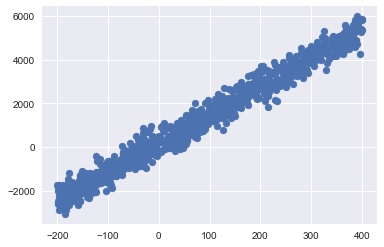

In [26]:
plt.scatter(xs, ys1);

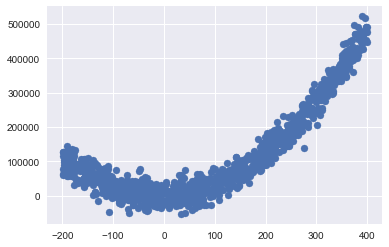

In [27]:
plt.scatter(xs, ys2);

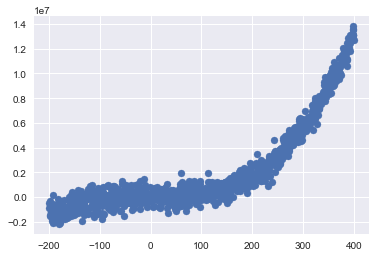

In [28]:
plt.scatter(xs, ys3);

### Covariance

$$cov_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n}$$


A measure of how much two variables change together. It is a dot product, so the covariance is
maximized if the two vectors are identical, 0 if they are orthogonal, and 98 Chapter 7. Relationships between variables negative if they point in opposite directions.

In [29]:
x_diffs = xs - xs.mean()
y_diffs = ys1 - ys1.mean()
x_diffs.dot(y_diffs) / x_diffs.size

394763.3288234222

In [30]:
# np.cov(x, y) espera una matriz de dimensión (2,n)
np.array([xs, ys1, ys2, ys3]).shape

(4, 1000)

In [31]:
all_vars = np.array([xs, ys1, ys2, ys3])
all_vars

array([[ 2.15983560e+02,  3.20703137e+02,  3.18528681e+02, ...,
         3.38127373e+01,  1.63035895e+02,  3.86798237e+02],
       [ 2.73257667e+03,  4.34164658e+03,  4.30956545e+03, ...,
         2.00902082e+02,  2.78224232e+03,  5.54522325e+03],
       [ 1.90454806e+05,  3.24932223e+05,  2.91741083e+05, ...,
        -5.22742427e+04,  6.17510360e+04,  4.75508895e+05],
       [ 2.49484631e+06,  7.44591024e+06,  6.69667158e+06, ...,
        -8.58238472e+04,  3.06810353e+04,  1.05883170e+07]])

In [32]:
np.cov(all_vars) # Matriz de covarianza. Obsérvese cómo aumenta de orden de magnitud con órdenes mayores

array([[3.02983986e+04, 3.95158487e+05, 1.78807004e+07, 5.09345391e+08],
       [3.95158487e+05, 5.28273492e+06, 2.33419979e+08, 6.65738216e+09],
       [1.78807004e+07, 2.33419979e+08, 1.76408094e+10, 4.32499364e+11],
       [5.09345391e+08, 6.65738216e+09, 4.32499364e+11, 1.22031736e+13]])

### Correlation and dependence

#### Pearson correlation coefficient


$$ r = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2}} $$


Pretty ugly, huh? But fear not! Remember:


$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

In [33]:
stats.pearsonr(xs, ys1) # Correlación muy alta (~0.99)

(0.9877159512726269, 0.0)

In [34]:
np.corrcoef(all_vars) # Matriz de correlaciones

array([[1.        , 0.98771595, 0.77342006, 0.83765686],
       [0.98771595, 1.        , 0.76462653, 0.82915874],
       [0.77342006, 0.76462653, 1.        , 0.93215863],
       [0.83765686, 0.82915874, 0.93215863, 1.        ]])

Mapas de colores:
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Atendiendo al tipo de datos que se quiere presentar, interesa usar unos mapas de colores u otros: enfatizando respecto a un valor crítico, valores ordenados...

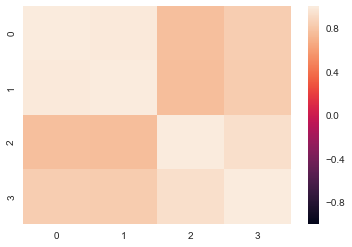

In [35]:
sns.heatmap(np.corrcoef(all_vars), vmin=-1, vmax=1);

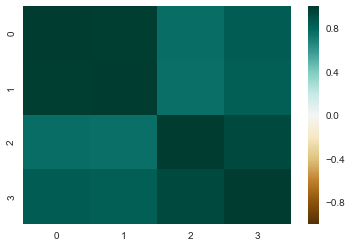

In [36]:
sns.heatmap(np.corrcoef(all_vars), vmin=-1, vmax=1, cmap='BrBG');

![Pearson correlations](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

#### *Precaución!! Que se obtenga un coeficiente de correlación de Pearson cercano a 0, no quiere decir que no haya otro tipo de correlaciones!!*

En el libro de [Statistcal Science](https://projecteuclid.org/euclid.ss/1009213726) se debate la doble cultura de utilizar un modelo estadístico tradicional (estocástico) VS los algoritmos que asumen datos de origen desconocido.

#### Spearman correlation coefficient

Lo que intenta es analizar si dos variables crecen en la misma dirección, sin incidir en la magnitud. Es decir, que:

&emsp; $\forall n\in\mathbb{N} : x_{n+1} > x_{n} \Rightarrow y_{n+1} > y_{n}$

[List of mathematical symbols](https://en.wikipedia.org/wiki/List_of_mathematical_symbols#Operators_acting_on_functions_or_sequences)

In [37]:
stats.spearmanr(xs, ys1)

SpearmanrResult(correlation=0.9881109761109763, pvalue=0.0)

In [38]:
stats.pearsonr(xs, ys1)

(0.9877159512726269, 0.0)

In [39]:
stats.pearsonr(xs, ys3), stats.spearmanr(xs, ys3)

((0.8376568594461196, 2.2568289602227578e-264),
 SpearmanrResult(correlation=0.8886027966027966, pvalue=0.0))

Aquí se observa cómo el Coeficiente de Pearson reconoce relación lineal en los datos. Por contra, para el caso del Coeficiente de Spearman, como no se satisface que:

&emsp; $\forall n\in\mathbb{N} : x_{n+1} > x_{n} \Rightarrow y_{n+1} > y_{n}$,

el Coeficiente de Spearman tiene un valor muy inferior.

## Probability

Let's play with a coin

In [40]:
# Experimento de Bernoulli

import random

n = 1000
p = .5
random.randint(0,1) > p # Cada vez que ejecute, me sacará un 0 ó un 1, sin ningún sesgo (p=0.5 para cada uno)

True

In [41]:
# Hacer el experimento 1000 veces

[random.random() > p for _ in range(n)]

[False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Fa

In [42]:
successes = sum([random.random() > p for _ in range(n)]) # El "_" sirve para explicitar que no se utilizará
successes # La esperanza matemática será de 500

504

In [47]:
observations = 350
results = []

for _ in range(observations): # Repites 350 veces el experimento de 1000 lanzamientos
    results.append(sum([random.random() > p for _ in range(n)]))
    
results

[503,
 486,
 489,
 497,
 495,
 523,
 500,
 486,
 505,
 515,
 511,
 514,
 500,
 492,
 516,
 504,
 496,
 490,
 501,
 497,
 476,
 486,
 485,
 460,
 476,
 508,
 511,
 527,
 479,
 517,
 494,
 486,
 508,
 479,
 478,
 487,
 456,
 482,
 527,
 512,
 500,
 489,
 489,
 520,
 507,
 517,
 501,
 487,
 496,
 482,
 500,
 519,
 494,
 537,
 505,
 481,
 509,
 467,
 501,
 494,
 495,
 511,
 493,
 484,
 511,
 493,
 544,
 523,
 526,
 499,
 532,
 489,
 490,
 501,
 516,
 506,
 504,
 521,
 501,
 546,
 509,
 507,
 492,
 506,
 493,
 470,
 525,
 495,
 489,
 502,
 509,
 506,
 499,
 484,
 515,
 518,
 508,
 510,
 504,
 473,
 501,
 506,
 499,
 507,
 525,
 481,
 492,
 483,
 519,
 485,
 521,
 503,
 515,
 484,
 505,
 497,
 501,
 482,
 470,
 498,
 496,
 502,
 512,
 503,
 520,
 499,
 517,
 515,
 498,
 501,
 494,
 495,
 494,
 489,
 482,
 509,
 519,
 503,
 498,
 495,
 520,
 498,
 525,
 472,
 510,
 508,
 486,
 492,
 506,
 523,
 477,
 521,
 506,
 519,
 486,
 512,
 499,
 510,
 511,
 483,
 513,
 483,
 505,
 474,
 493,
 503,
 489

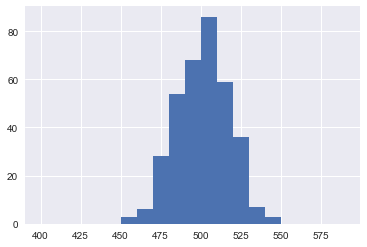

In [48]:
plt.hist(results, bins=range(400, 600, 10)); # A esto se le llama Distribución Binomial

Now with numpy

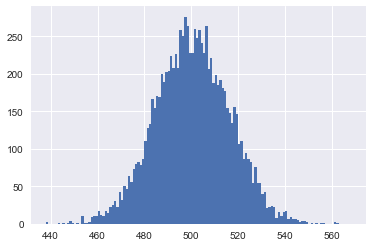

In [49]:
n = 1000
p = .5
size = 10000

tries = np.random.binomial(n, p, size)
plt.hist(tries, bins=range(tries.min(), tries.max()));

Según se aumentan *n* y *size*, por la Ley de los números grandes, se va acercando a una versión más escalable de los resultados del ensayo

#### Exercise

The p-value is a widely used (and criticized) measure of how surprising an observation is under a given set of assumptions.

It is defined as "the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct" [1](https://en.wikipedia.org/wiki/P-value).

Let's play with a lot of coins. Calculate experimentally the p-value of getting 120 heads when launching 1000 heavily weighted coinds, each with a $p_{heads}=0.1$.


In [50]:
n = 1000
p = .1
size = 10000

tries = np.random.binomial(n, p, size)
heads = sum(tries >= 120)
probability = heads / size
probability

0.0194

In [53]:
# Otro método

n = 1000
p = .1
size = 10000

tries = np.random.binomial(n, p, size)
unique, counts = np.unique(tries, return_counts=True)
unique, counts

(array([ 64,  65,  66,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        133]),
 array([  1,   1,   3,   3,   2,   5,   3,   7,   9,   9,  22,  20,  28,
         41,  51,  68,  78, 101, 122, 166, 146, 150, 206, 273, 285, 291,
        362, 373, 366, 412, 395, 433, 403, 403, 423, 417, 426, 365, 313,
        324, 357, 308, 264, 215, 183, 177, 165, 141, 139, 111,  89,  60,
         57,  61,  32,  29,  20,  16,  14,  12,  10,   9,   5,   7,   9,
          4]))

Esto nos da una tupla con dos arrays: el primero da cada una de las observaciones de *size*; y el segundo la frecuencia asociada a cada una de esas observaciones. Nótese la acumulación en frecuencia en torno a 100, ya que 100 heads supone el 10% de cada set de 1000 lanzamientos.

<BarContainer object of 13 artists>

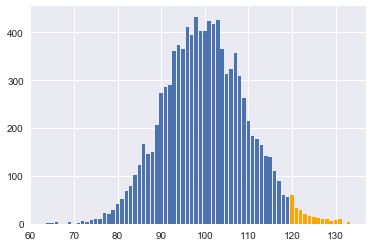

In [54]:
good = unique >= 120
plt.bar(unique[~good], counts[~good])
plt.bar(unique[good], counts[good], color='orange')

### Intersection

In [55]:
n = 1000
p = .5

left = np.random.uniform(size=1000) > p # Intentarlo con la mano izda
right = np.random.uniform(size=1000) > p # Intentarlo con la mano dcha
left.mean(), right.mean()

(0.491, 0.461)

In [56]:
(left & right) # Esto es en cuántos intentos se ha dado cara en común izda y dcha
# El ampersand '&' significa bit-wise, es decir, elemento a elemento

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,

In [57]:
(left & right).sum()

233

Let's play with loaded coins

In [58]:
n = 1000
p = .3

left = np.random.uniform(size=1000) < p # Intentarlo con la mano izda
right = np.random.uniform(size=1000) < p # Intentarlo con la mano dcha
left.mean(), right.mean(), (left & right).mean()

(0.316, 0.287, 0.083)

Se observa que se cumple que el producto de la probabilidad de cada una de ellas, coincide con la propbabilidad intersección. Esto ocurre porque son sucesos independientes

### Union

In [59]:
n = 1000
p = .5

left = np.random.uniform(size=1000) < p # Intentarlo con la mano izda
right = np.random.uniform(size=1000) < p # Intentarlo con la mano dcha
left.mean(), right.mean(), (left | right).mean()

(0.489, 0.485, 0.723)

Se observa que se trata del complementario del anterior. Que salga una U otra, es la probabilidad total (1) menos la probabilidad de que se produzca la intersección de ambas

### Conditioned Probability


$$P(A\mid B) = \frac{P(A\cap B)}{P(B)}$$


### Independent events

Definition:

$$P(A\mid B) = P(A)$$

Properties:

$$P(A \cap B) = P(A) \cdot P(B)$$

$$P(A \mid B) = P(A)$$

$$P(B \mid A) = P(B)$$

### Law of total probability

$$P(S) = \sum_{i=1}^n P(S \mid S_i)P(S_i)$$

### Bayes theorem

$$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$$

Permite incorporar fácilmente información nueva. Suponiendo el siguiente ejemplo:

EJEMPLO. Existe un test diagnóstico frente al COVID:

- $+\equiv$ Diagnosticado COVID
- $-\equiv$ Diagnosticado NO COVID
- $C\equiv$ Real COVID
- $NC\equiv$ Real NO COVID
______________________________________________

Con las siguientes sensibilidades:

- $P(+|C) = 0.98$
- $P(-|NC) = 0.97$
- $P(C|+) \Rightarrow$  No se puede saber!

Pero si además sabemos que:

- $P(C) = 0.01$ (personas con COVID)

Por el Teorema de la Probabilidad Total tenemos que:

- $P(+) = P(+|C) \times P(C) + P(+|NC) \times P(NC) = 0.98 \times 0.01 + (1-0.97) \times (1-0.01) = 0.0198$ (personas diagnosticadas positivo)

Mediante el Teorema de Bayes determinamos que:

- $P(C|+) = \frac{ P(+|C)  \times  P(C) }{P(+)} = \frac{ 0.98  \times  0.01 }{0.0198} \approx 0.25 \Rightarrow$ **25% \!\!\!** $\rightarrow$ De hecho, asumiendo una proporción de enfermos reales $P(C)$ constante, cuanto más "precisa" sean las tasas de diagnóstico $P(+|C) y P(-|NC)$ , mayor será la probabilidad de falso positivo $P(C|+)$!!!

REPASAR ESTO, NO PUEDE SER!!

## Random variable


https://docs.scipy.org/doc/scipy/reference/stats.html

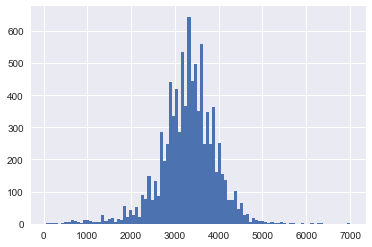

In [60]:
plt.hist(df['birthwgt_g'], bins=np.linspace(df['birthwgt_g'].min(), df['birthwgt_g'].max(), 100));

## Discrete and continuous variables

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

### Discrete variables



<BarContainer object of 19 artists>

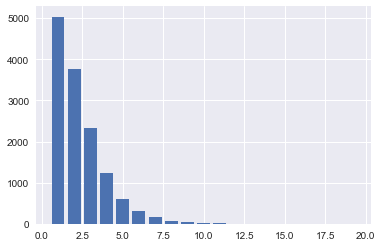

In [61]:
xs, ys = np.unique(df['pregordr'], return_counts=True) # Orden de embarazo, número de hijo
plt.bar(xs, ys)

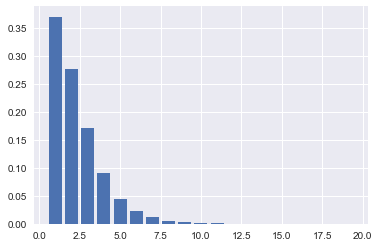

In [62]:
plt.bar(xs, ys / ys.sum()); # Función de masa de probabilidad

### Binomial Distribution

In [63]:
n = 8
p = .5

binom = stats.binom(n, p)

### Generating random observations

In [64]:
binom.rvs(10000)

array([6, 4, 4, ..., 7, 3, 5])

#### pmf

Probability Mass Function

In [65]:
binom.pmf(4) # Probabilidad de sacar 4 caras

0.27343750000000017

In the data:

#### Exercise

What is the probability of getting 3 or fewer heads when tossing 8 times a fair coin?

In [66]:
(binom.rvs(10000) <= 3).mean()

0.3597

In [67]:
binom.pmf(3) + binom.pmf(2) + binom.pmf(1)

0.3593750000000002

In [68]:
binom.pmf(range(4)).sum()

0.3632812500000002

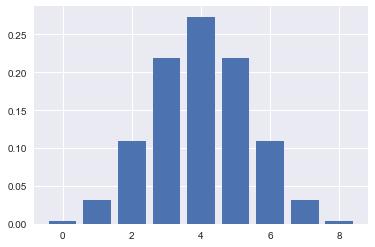

In [69]:
xs = range(n + 1)
ys = binom.pmf(xs)

plt.bar(xs, ys);

#### cdf

Cumulative Distribution Function

0.3632812500000001

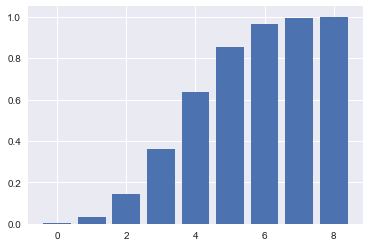

In [70]:
xs = range(n + 1)
ys = binom.cdf(xs)

plt.bar(xs, ys);
binom.cdf(3)

### Poisson

Sirve para saber, de media, cuántas cartas recibiré, por ejemplo.

### Continuous distributions



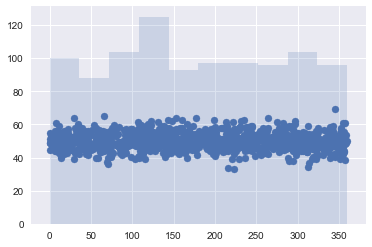

In [71]:
left, right = 0, 360
n = 1000
uniform = stats.uniform(left, right - left)
rs = uniform.rvs(size=n)
rs
plt.hist(rs, alpha=.2)
irrelevant = jitter(np.repeat(50, rs.size))
plt.scatter(rs, irrelevant)

What is the probabilty of `uniform` being exactly 0?

In [72]:
left, right = 0, 360
n = 1000
uniform = stats.uniform(left, right - left)
rs = uniform.rvs(size=n)

(rs == 0).sum()

0

Es una variable continua, por lo que por mucho que aumentemos *n*, va a seguir siendo probabilidad 0. Es virtualmente imposible que sea justo 0

#### pdf


Probability Density Function

In [73]:
uniform.pdf(0)

0.002777777777777778

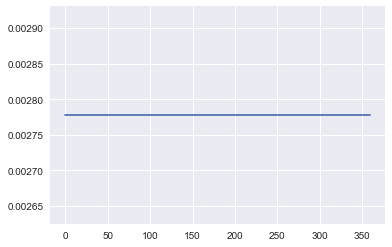

In [74]:
plt.plot(range(360), uniform.pdf(range(360)))

In [75]:
uniform.pdf(range(360)).sum()

1.0

In [76]:
uniform.pdf(np.linspace(0, 360, 1000)).sum()

2.777777777777777

In [77]:
uniform.cdf(20) # Probabilidad de que el avión se haya estrellado entre el meridiano 0 y el 20

0.05555555555555555

#### Exercise

What is the probability of `uniform` taking a value between 10 and 15?

In [82]:
uniform.cdf(15) - uniform.cdf(10)

0.013888888888888888

### Normal

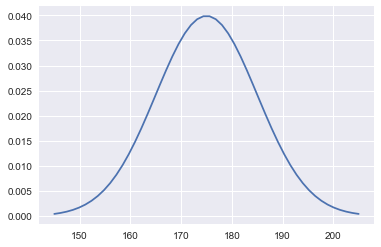

In [78]:
normal = stats.norm(175, 10) # Altura normal personas
xs = np.linspace(145, 205)

plt.plot(xs, normal.pdf(xs));

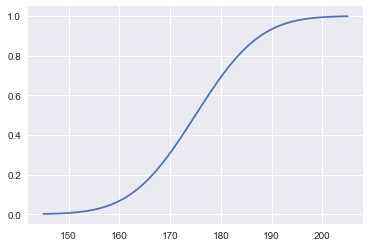

In [79]:
plt.plot(xs, normal.cdf(xs)); # Esta es la integral de la anterior (el área)

In [80]:
# Probabilidad de medir menos de 150 cm? ~ 0.6%
normal.cdf(150)

0.006209665325776132

In [81]:
# Probabilidad de medir entre 165 y 185 cm? ~ 68%
normal.cdf(185) - normal.cdf(165)

0.6826894921370859

#### Exercise

Approximate the shaded area below the curve using `normal.pdf(xs)`

In [84]:
normal.pdf(xs).sum()

0.8148779249594641

#### Checking normality

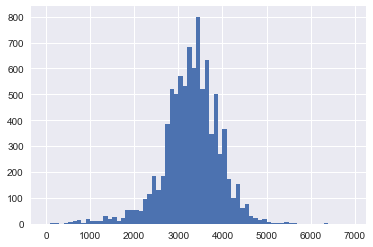

In [85]:
# Comprobando si realmente se adapta a una normal
plt.hist(df['birthwgt_g'], bins=range(0, 7000, 100));

Opción 1

In [86]:
df['birthwgt_g'].mean(), df['birthwgt_g'].std()

(3298.4223722062566, 639.3544362389737)

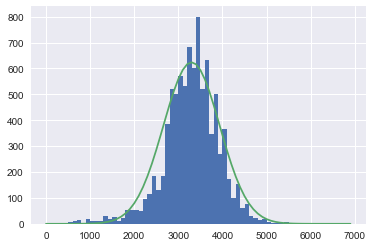

In [87]:
norm_like_weight = stats.norm(df['birthwgt_g'].mean(), df['birthwgt_g'].std())

plt.hist(df['birthwgt_g'], bins=range(0, 7000, 100));
plt.plot(range(0, 7000, 100), norm_like_weight.pdf(np.arange(0, 7000, 100))*1000000);
# El '*1000000' es para que tenga una altura comparable

Opción 2

In [88]:
sm.qqplot(df['birthwgt_g'].dropna(), norm_like_weight, line='45');
plt.gcf().set_size_inches(7, 6)

AttributeError: 'rv_frozen' object has no attribute 'fit'

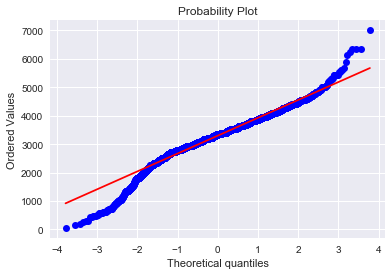

In [90]:
# Alternativa encontrada online dado que qqplot no me funciona...
stats.probplot(df['birthwgt_g'].dropna(), plot=plt)
plt.show()

Observando el gráfico, se ve que en una parte del gráfico se adapta suficientemente bien, pero en los extremos se aleja un poco, indicando que no se adapta realmente bien a una normal

### The central limit theorem

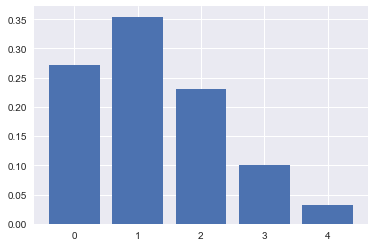

In [91]:
rate = 1.3 # De media recibo 1.3 emails al día

poisson = stats.poisson(rate)
xs = range(5)
plt.bar(xs, poisson.pmf(xs));

In [92]:
size = 1000 # Ver qué pasa a lo largo de 1000 días
rs = poisson.rvs(size)
rs.mean()

1.397

In [93]:
# La "MAGIA"
size = 1000 # Ver qué pasa a lo largo de 1000 días
rs = poisson.rvs(size)
rs

array([2, 2, 4, 2, 1, 2, 2, 0, 4, 1, 0, 1, 1, 2, 4, 2, 2, 0, 1, 1, 2, 0,
       6, 1, 2, 2, 5, 1, 3, 0, 0, 0, 0, 2, 0, 1, 0, 3, 1, 1, 0, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1,
       1, 0, 1, 1, 2, 1, 2, 0, 3, 2, 1, 1, 3, 1, 2, 1, 3, 1, 0, 1, 3, 0,
       2, 1, 1, 3, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 4, 0, 0, 0, 4, 0, 0, 2,
       4, 1, 0, 0, 0, 1, 0, 2, 1, 1, 4, 2, 2, 1, 1, 3, 1, 0, 1, 0, 2, 2,
       1, 2, 3, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 3, 0, 1, 1,
       1, 1, 2, 3, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0,
       0, 1, 0, 1, 3, 1, 1, 1, 3, 0, 1, 0, 2, 1, 2, 0, 2, 4, 0, 1, 2, 0,
       1, 2, 1, 1, 2, 0, 3, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2,
       0, 0, 2, 4, 1, 1, 1, 1, 2, 0, 1, 2, 3, 2, 0, 0, 1, 1, 3, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1,
       3, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0,

In [94]:
np.random.choice(rs, size=100).mean()

1.34

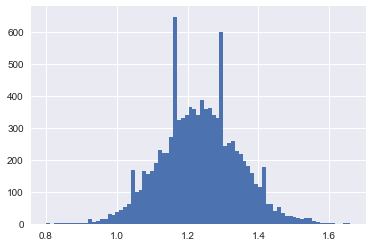

In [96]:
means = np.array([np.random.choice(rs, size=100).mean() for _ in range(10000)])
plt.hist(means, bins=np.linspace(means.min(), means.max(), 80));

#### Es una normal!!!!

# Further reading

https://greenteapress.com/wp/think-stats-2e/

https://en.wikipedia.org/wiki/Correlation_and_dependence

https://www.cdc.gov/nchs/nsfg/index.htm?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fnchs%2Fnsfg.htm

https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

https://xkcd.com/882/

https://projecteuclid.org/euclid.ss/1009213726